# Multi-Class Text Classification

![alt text](https://miro.medium.com/max/966/0*X7PVc7QwrpFnyo4p.png)


In this project, we will create a model to predict the label of class, given the `text`. In the following post, we will walk through series of steps on how to get started with building model using [Google Colab](https://colab.research.google.com/). We will go through detail process on each step on how to approach to classfication problem. 

## Classification

Classification is technique to categorize our data into a desired and distinct number of classes where we can assign label to each class.Generally, classification can be broken down into two areas:

1. Binary classification, where we wish to group an outcome into one of two groups - these are usually represented as 0's and 1's in our data..

2. Multi-class classification, where we wish to group an outcome into one of multiple (more than two) groups. While binary classification alone is incredibly useful, there are times when we would like to model and predict data that has more than two classes. 

### Text classification

Text classification (also known as text tagging or text categorization) is a process in which texts are sorted into categories. For example, you can classify news articles by topic, customer feedback by sentiment, support tickets by urgency, and so on. This process can be done either manually (carried out by a human agent who reads texts and categorizes them) or automatically (which involves machine learning processes and algorithms that will classify your texts in a faster and more cost-effective way). 


### Structure of project

1. Introduction
    - Classification

2. Data Understanding
    - Load data
    - Check for null and missing values
    - Check for duplicated rows
    - Label Encoding
3. Data Preperation
    - Lowercase
    - Stopwords
    - Tokenization 
    - Lemmentation
4. Model Preperation 
    - Define the model 
    - Set the optimizer 
5. Model Evaluation 
    - Hyperparameter tuning
6. Prediction and submission
    - Export model 
    - Import model


## Getting started

For this problem, we are given two CSV files, `train_set.csv` and `test_set.csv`. We are going to use the training file to train and test the model, and we then use the model to predict the unknown values in the text file. The first steps are to read in the files and perform some preliminary analysis to determine what pre-processing we will need before attempting to train a model.


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# installing libraries requiered for this project

# imblear for smote algorithm: balancing dataset
!pip install imblearn

# installing autotime
!pip install ipython-autotime

# installing word segment
!pip install wordsegment 

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=a1fe52c808beccc28e89284a0f1f7c0e1df7411592eade178aae154d083f26b1
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
     |████████████████████████████████| 4.8MB 3.2MB/s 


## Import libraries

Let's now import the required libraries and load the dataset into our application. The following script imports the required libraries:

In [4]:
import re
import string
from string import punctuation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# importing for wordcloud
import collections 
from wordcloud import WordCloud

# importing for text processing 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from textblob import TextBlob
from textblob import Word
from wordsegment import load, segment 
load()

# 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn



# sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# keras
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,Flatten,LSTM, SpatialDropout1D,Activation
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Conv1D, GlobalMaxPooling1D,Dropout

# pickle
import pickle

#  
np.random.seed(500)

# 
%load_ext autotime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
# setting properties of datafrme 

# column display size
pd.set_option("display.max_colwidth", 300)

# warrning option
pd.set_option('mode.chained_assignment', None)

time: 2.35 ms


## Data Understanding

There are 12 output labels for each text: . A text can belong to all of these categories ,which makes it a multi-label classification problem.

We will use both "train_set.csv" and "test_set.csv" file that contains 23615 and 5894 records respectively.

### 2.1 Load data 

Now lets load data into the memory.


In [6]:
# load the data
train = pd.read_csv('train_set.csv',  encoding='latin-1')
test = pd.read_csv('test_set.csv',  encoding='latin-1')
print(train.shape)
train.head()

(23615, 2)


,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for circuit breaker captive consumption
2,85389000,lv ma pd trip unit for cvs parts of circuit breakers
3,85389000,lv na p trip unit for cvs switch parts of circuit breaker
4,85389000,lv tmd pd trip unit for cvs parts of circuitbreakers


time: 287 ms


The dataset contains 23615 records and 1 columns. The header of the dataset is up above.

Once the files have been imported we will try to understand more about data and get some more information about the dataset.

In [7]:
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("Duplicated rows:")
    duplicate_rows = train[train.duplicated()]
    print("Duplicated rows: " ,len(duplicate_rows))

describe_data(train)

Data Types:
label     int64
text     object
dtype: object
Rows and Columns:
(23615, 2)
Column Names:
Index(['label', 'text'], dtype='object')
Null Values:
label    0.0
text     0.0
dtype: float64
Duplicated rows:
Duplicated rows:  12243
time: 38.5 ms


This gives the following information about the data set;
- That we have text column as non numeric which will need some pre-processing before they can be used to build a model.
- That we have a relatively small data set consisting of 11372 rows and 2 columns.
- That there are no null values present in the data
- Thata there are 12243 duplicated rows which has to be removed.

85389000    2936
85177090    2581
85369090    2438
39269099    2189
73181500    2033
85366990    1944
85238090    1720
85364900    1714
87089900    1673
33041000    1605
87082900    1451
84713010    1331
Name: label, dtype: int64

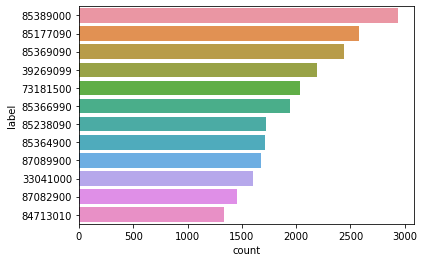

time: 229 ms


In [8]:
# plot the frequency of each class
sns.countplot(y = 'label',
              data = train,
              order = train['label'].value_counts().index)

# occurence of each class
train['label'].value_counts()

There are 12 distinct classes and all classes don't have balanced distribution of data. We can see class `85389000` (2936 rows) have more dataset that class `84713010`(1331 rows). 

If we train classifier on this data, the accuracy of the classifier would be maximum for class `85389000` (top row) and for class (below row) the model treats it as minority class. So, we need to balance our data. 

To balance imbalanced dataset there are multiple approaches we has been discussed below.


In [9]:
# replacing labels with new encoded labels
# The labels are replaced from number 1 to 12 
# such that 1 has highest number of distribution i.e 2926
# and 12 has the lowest number of distribution i.e. 1331


replace_values = {85389000 : 1, 85177090 : 2, 85369090 : 3, 39269099 : 4,
                  73181500 : 5, 85366990 : 6, 85238090 : 7, 85364900 : 8, 87089900 : 9,
                  33041000 : 10 ,87082900 : 11 , 84713010 : 12 }   

train = train.replace({"label": replace_values})                                                                                             

# occurence of each class
train['label'].value_counts()

1     2936
2     2581
3     2438
4     2189
5     2033
6     1944
7     1720
8     1714
9     1673
10    1605
11    1451
12    1331
Name: label, dtype: int64

time: 17.6 ms


Each class has been label to corresponding values from 1 to 12. This makes it easier to read each class. 

## Data Pre-processing


Most machine learning models are unable to handle non-numeric columns, and missing values in data. It is therefore necessary to perform a number of pre-processing steps.

Once the dataset has been imported, the next step is to preprocess the text. Text may contain numbers, special characters, and unwanted spaces. Depending upon the problem we face, we may or may not need to remove these special characters and numbers from text. However, for the sake of explanation, we will remove all the special characters, and unwanted spaces from our text. 
- Remove duplicated rows 
- Lowercase
- Remove punctuation
- Remove stopwords
- Spelling correction
- Tokenization 



In [10]:
def clean_dataset(df):
  """
  Data cleaning and processing of text data. 

  INPUT:
  df: dataframe(object): 

  OUTPUT
  df: dataframe(object): cleaned dataframe object for 
  """

  # duplicated rows
  print("\nDroping duplicated rows . . .") 
  print("Total rows :", len(df))  
  df = df.drop_duplicates( keep='first')
  print("Total rows after removing duplicate :", len(df))

  # replacing more than one empty space
  print("\nReplacing more than one spaces . . . ")
  df['text'] = df['text'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

  # lower case
  print("\nConverting to lowercase . . .")
  df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

  # replacing single words
  print("\nReplacing single words . . . ")
  df['text'] = df['text'].str.replace('[^\w\s]','')

  # stopwords
  print("\nReplacing stop words . . .") 
  df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # spelling correction 
  print("\nSpelling correction . . . .")
  train['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

  return df

time: 14.4 ms


In the script above we start by removing all duplicated rows from `label` and `text` column. 

Next, we remove all the single characters. To remove  single characters we use `\s+[a-zA-Z]\s+` regular expression which substitutes all the single characters having spaces on either side, with a single space.

Next, we use the `\^[a-zA-Z]\s+` regular expression to replace a single character from the beginning of the document, with a single space. Replacing single characters with a single space may result in multiple spaces, which is not ideal.

We again use the regular expression `\s+` to replace one or more spaces with a single space. When you have a dataset in bytes format, the alphabet letter "b" is appended before every string. The regex ^b\s+ removes "b" from the start of a string. The next step is to convert the data to lower case so that the words that are actually the same but have different cases can be treated equally.

The final preprocessing step is the use of stopwords. Stopwords are words that a search engine has been programmed to ignore. We would not want these words taking up space in our database, or taking up valuable processing time. So we will remove all those words. 

Finally we need to perform lemmatization, but lets further analyze how lemmatization can improve out model. To understand thise we will plot most frequent words with and without lemmatization and see how it can help us to build better model.


In [11]:
# cleaning train_set.csv

train= clean_dataset(train)
print("\nLength of training set:", len(train))


Droping duplicated rows . . .
Total rows : 23615
Total rows after removing duplicate : 11372

Replacing more than one spaces . . . 

Converting to lowercase . . .

Replacing single words . . . 

Replacing stop words . . .

Spelling correction . . . .

Length of training set: 11372
time: 1.36 s


In [12]:
# Cleaning test_set.csv dataset

print("Cleaning testing dataset . . . \n")
test  = clean_dataset(test)
print("\nLength of testing set:", len(test))

Cleaning testing dataset . . . 


Droping duplicated rows . . .
Total rows : 5894
Total rows after removing duplicate : 3849

Replacing more than one spaces . . . 

Converting to lowercase . . .

Replacing single words . . . 

Replacing stop words . . .

Spelling correction . . . .

Length of testing set: 3849
time: 1.09 s


In [13]:
# Most frequent words on training set 
text_frequency_train_before_lemmatize = pd.Series(''.join(train['text']).split()).value_counts()[:50]

# Most frequent words on testing set 
text_frequency_test_before_lemmatize = pd.Series(''.join(test['text']).split()).value_counts()[:50]

time: 65.2 ms


`text_frequency_train_before_lemmatize` and `text_frequency_test_before_lemmatize` contains series of most frequent words without lemmatization. Now, lets plot these words on wordcloud and analyze the situation.

In [14]:
# counting the frequency of each word

def word_frequency(text_frequency, text):
  """
  Counts the repeatation of each word in the given string.

  INPUTS:
  text_frequency : Series: Most frequent words from training set.  
  text : String : Description about word cloud 

  OUTPUTS:
  """

  print(text)  

  # plotting word frequency
  wc = WordCloud().generate_from_frequencies(text_frequency)
  plt.figure(figsize=(10,8), facecolor='k')
  plt.imshow(wc)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show() 

time: 5.5 ms


Top 50 most frequent words on training. . .


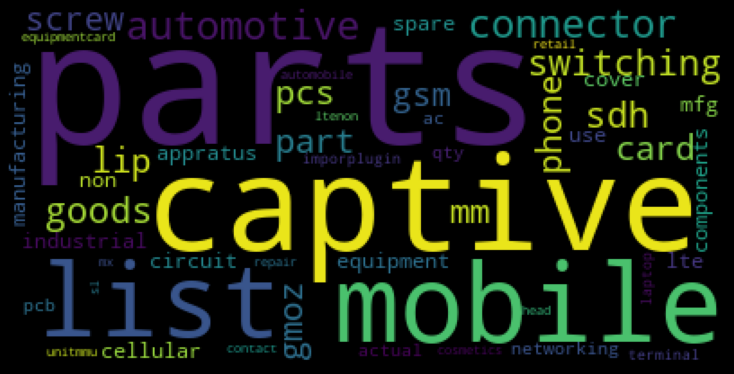

time: 411 ms


In [15]:
word_frequency(text_frequency_train_before_lemmatize,"Top 50 most frequent words on training. . .")


Top 50 most frequent words on testing set . . .


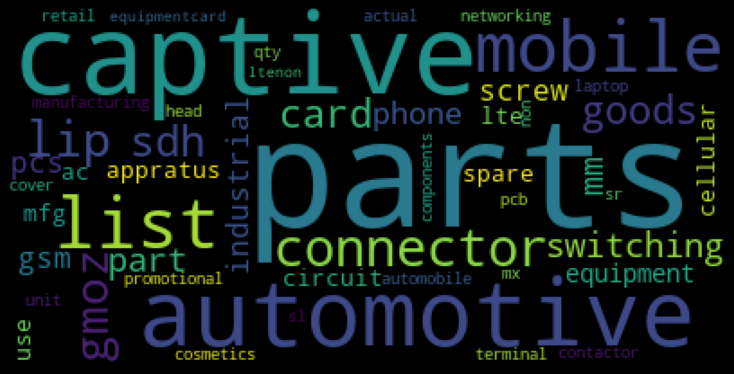

time: 431 ms


In [16]:
word_frequency(text_frequency_test_before_lemmatize, "Top 50 most frequent words on testing set . . .")

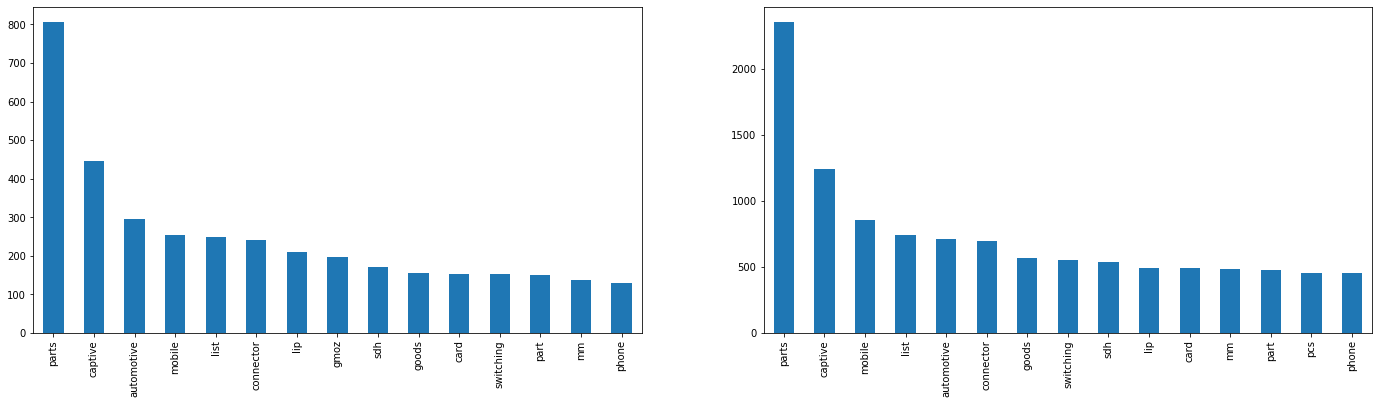

time: 613 ms


In [17]:
# plot the most 15 frequent words on training and testing file with number of its occurence

fig, axs = plt.subplots(1,2)
pd.Series(''.join(train['text']).split()).value_counts()[:15].plot(kind='bar', figsize=(24,6), ax=axs[1])
pd.Series(''.join(test['text']).split()).value_counts()[:15].plot(kind='bar', figsize=(24,6), ax=axs[0])

> As we can see, we have not performed text normalization, which is why many words are not reduced to its root form. However, this step colud be done in preprocessing step earlier. But I have used it here so we can see how the data processing is really happening.

> Here is an example, the word `parts` and `part` has repeated two times even though its root meaning is same.

> This can be elemintaed using `text normalization`, which has been performed in following section. 


### Text normalization 

Lemmatization: Lemmatization is simply normalization of words, which means reducing a word to its root form.




In [18]:
# lemmatization of training set
train['text'] = train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# lemmatization of testing set
test['text'] = test['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


time: 2.22 s


In lemmatization, we reduce the word into dictionary root form. For instance "parts" is converted into "part". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. For instance, we don't want two different features named "parts" and "part", which are semantically similar, therefore we perform lemmatization.

In [19]:
# Most frequent words on training set 
text_frequency_train_after_lemmatize = pd.Series(''.join(train['text']).split()).value_counts()[:50]

# Most frequent words on testing set 
text_frequency_test_after_lemmatize = pd.Series(''.join(test['text']).split()).value_counts()[:50]

time: 71.7 ms



> Lets again check most freqeunt words on training and testing file using `wordcloud.`




Top 50 most frequent word on training set . . .


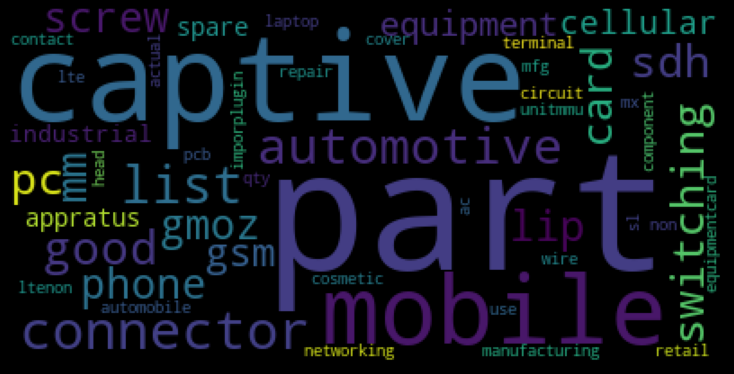

time: 498 ms


In [20]:
word_frequency(text_frequency_train_after_lemmatize,"Top 50 most frequent word on training set . . .")

Top 50 most frequent word on testing set . . .


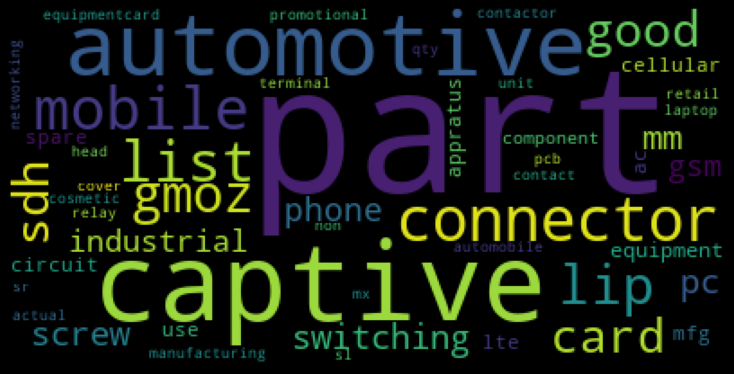

time: 425 ms


In [21]:
word_frequency(text_frequency_test_after_lemmatize,"Top 50 most frequent word on testing set . . .")

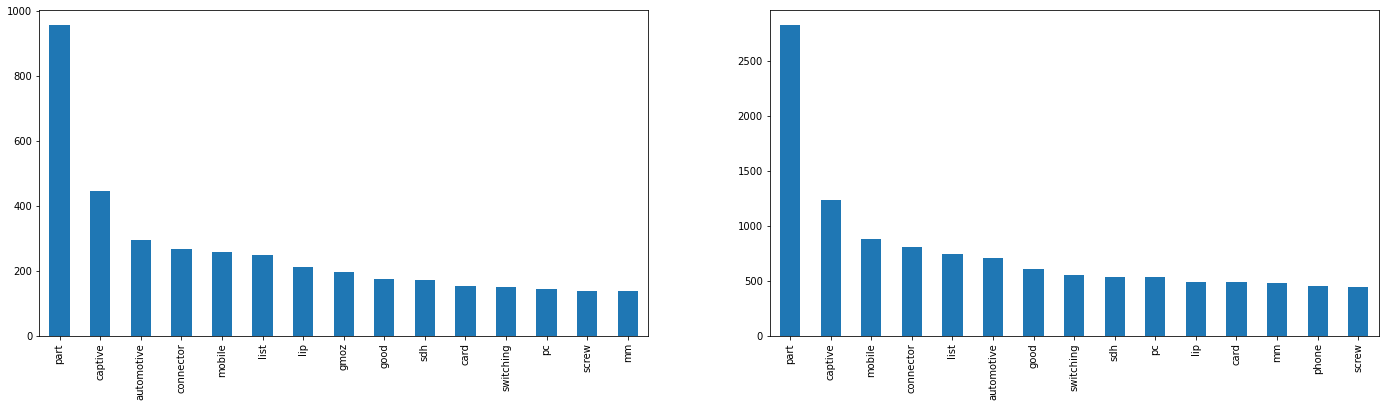

time: 612 ms


In [22]:
# plot the most 15 frequent words on training and testing file with number of its occurence

fig, axs = plt.subplots(1,2)

pd.Series(''.join(train['text']).split()).value_counts()[:15].plot(kind='bar', figsize=(24,6), ax=axs[1])
pd.Series(''.join(test['text']).split()).value_counts()[:15].plot(kind='bar', figsize=(24,6), ax=axs[0])

> As text normalization is performed, word such a `parts` and `part` is normalized to its root meaning 


> Our dataset has been furter cleaned.



# Converting text to number

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

Different approaches exist to convert text into the corresponding numerical form. The `Bag of Words Model` and the `Word Embedding Model` are two of the most commonly used approaches. 

**Finding TFIDF** 

The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular document. TFIDF resolves this issue by multiplying the term frequency of a word by the inverse document frequency. The TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".

The term frequency is calculated 

```
Term frequency = (Number of Occurrences of a word)/(Total words in the document)
```

And the Inverse Document Frequency is calculated as:

```
IDF(word) = Log((Total number of documents)/(Number of documents containing the word))
```



In [23]:
# seperating features and label column
y = train.label
x = train.drop('label',axis=1)

# list to hold text  
final_text = []

for word in x['text']:
  final_text.append(word)

# Vectorize and tokenize
tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(final_text).toarray()

time: 1.11 s


We have directly converted text documents into TFIDF feature values (without first converting documents to bag of words features) using the following scrip

# Training model 

Our dataset is unbalanced i.e. class distribution of each is not normally distributed.

> To see how imbalanced dataset affect our model performance. First lets train model without balancing and then by balancing dataset.

> The dataset will be trained on multiple classifiers and we will optimize every model and select most appropriate model.


### Training model without balanced dataset

Like any other supervised machine learning problem, we need to divide our data into training and testing sets. To do so, we will use the `train_test_split` utility from the `sklearn.model_selection` library. 

The script divides data into 20% test set and 80% training set.

In [24]:
# Train test split model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

time: 695 ms


To train our machine learning model using the random forest algorithm we will use `RandomForestClassifier` class from the sklearn.ensemble library. The `fit` method of this class is used to train the algorithm. We need to pass the training data and training target sets to this method. 


To evaluate the performance of a classification model such as the one that we just trained, we can use metrics such as the `confusion matrix`, `F1 measure`, and the `accuracy`.

To find these values, we can use `classification_report`, and `accuracy_score` utilities from the `sklearn.metrics` library. Execute the following script to do so:

In [25]:
# random forest classifier 
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# evaluation metrics 
print(classification_report(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.83      0.80       296
           2       0.92      0.94      0.93       314
           3       0.80      0.75      0.77       258
           4       0.65      0.83      0.73       297
           5       0.95      0.84      0.89       267
           6       0.81      0.71      0.76       201
           7       1.00      0.86      0.92        21
           8       0.86      0.82      0.84       105
           9       0.79      0.72      0.75       172
          10       1.00      1.00      1.00       117
          11       0.82      0.70      0.76       117
          12       0.97      0.96      0.97       110

    accuracy                           0.83      2275
   macro avg       0.86      0.83      0.84      2275
weighted avg       0.84      0.83      0.83      2275

Accuracy score:  0.8268131868131868
time: 7.3 s


**The accuracy comes out to be 82% but lets check if after balancing our dataset if accuracy of our model increases or not.**

## Handling the unbalanced dataset

There are multiple ways to handle unbalanced dataset. Particularily there are seven ways to handle unbalanced dataset.


1.   Using right evaluation metrics
2.   Resample the training set
3.   Using the k-fold Cross validation in the right way
4.   Ensemble  different resampled datasets
5.   Resample with different ratio
6.   Cluster the abundant class
7.   Design your own model

In this project we will implement **resampling techniques.**

**RESAMAPLING:**  SMOTE oversampling technique where the minority class is oversampled to increase the number of instances of that classes.

SMOTE (Synthetic Minority Oversampling Technique) -
It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. 

**Using SMOTE Algorithm**

You can check all the parameters from [link text](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)




In [0]:
# Here we will check oversampling of low and high distribution class. i.e. class 1 and class 12.

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '12': {} \n".format(sum(y_train == 12))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '12': {}".format(sum(y_train_res == 12))) 


Before OverSampling, counts of label '1': 1261
Before OverSampling, counts of label '12': 454 

After OverSampling, the shape of train_X: (15972, 13490)
After OverSampling, the shape of train_y: (15972,) 

After OverSampling, counts of label '1': 1331
After OverSampling, counts of label '12': 1331
time: 2min 55s


Now that we have balanced class distribution of dataset, we will again train the model and check overall performance on all class.

In [0]:
# classifier
classifier_1 = RandomForestClassifier(n_estimators=10, random_state=0)
classifier_1.fit(X_train_res, y_train_res.ravel()) 
y_pred_1 = classifier_1.predict(X_test)

# evaluating the model
print("\nEvaluating the model\n")
print(classification_report(y_test,y_pred_1))
print("Accuracy on testing set: ",accuracy_score(y_test, y_pred_1))



Evaluating the model

              precision    recall  f1-score   support

           1       0.80      0.82      0.81       296
           2       0.91      0.94      0.93       314
           3       0.82      0.76      0.79       258
           4       0.72      0.83      0.77       297
           5       0.97      0.83      0.90       267
           6       0.71      0.78      0.75       201
           7       0.90      0.86      0.88        21
           8       0.84      0.87      0.85       105
           9       0.77      0.74      0.75       172
          10       1.00      1.00      1.00       117
          11       0.84      0.74      0.79       117
          12       0.97      0.94      0.95       110

    accuracy                           0.84      2275
   macro avg       0.86      0.84      0.85      2275
weighted avg       0.84      0.84      0.84      2275

Accuracy on testing set:  0.8364835164835165
time: 10.1 s


**Once the dataset was balanced the accuracy has increased 1%.**

# Deep Learning Techniques



In [26]:
# seperating features and label column
y = train.label
x = train.drop('label',axis=1)

# list to hold text  
final_text = []

for word in x['text']:
  final_text.append(word)


time: 6.1 ms


In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

time: 16.8 ms


The above function is used to plot accuacy and loss graph.

## Convolution Neural Network(CNN)

CNN has hidden layers which are called convolutional layers. Convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. 


In [98]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
MAX_SEQUENCE_LENGTH = 250

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(train['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(train['label']).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 13513 unique tokens.
Shape of data tensor: (11372, 250)
Shape of label tensor: (11372, 12)
(9097, 250) (9097, 12)
(2275, 250) (2275, 12)
time: 461 ms


### Word embedding on test_set.csv 

In [56]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
MAX_SEQUENCE_LENGTH = 250

tokenizer_test = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer_test.fit_on_texts(test['text'].values)
word_index_test = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_test))

X_test_csv = tokenizer.texts_to_sequences(test['text'].values)
X_test_csv = pad_sequences(X_test_csv, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of data tensor:', X_test_csv.shape)

print(X_test_csv.shape)

Found 6232 unique tokens.
Shape of data tensor: (3849, 250)
(3849, 250)
time: 152 ms


In [30]:
# set parameters:
batch_size = 64
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Build model...')
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=X.shape[1]))
model.add(Dropout(0.2))

# add a Convolution1D
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))

# max pooling:
model.add(GlobalMaxPooling1D())

# vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# output layer, and squash it with a sigmoid:
model.add(Dense(12, activation='softmax'))

# summary
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 50)           311650    
_________________________________________________________________
dropout (Dropout)            (None, 250, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 248, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

Epoch 1/2
143/143 [==============================] - 19s 132ms/step - loss: 0.2180 - accuracy: 0.3746 - val_loss: 0.1360 - val_accuracy: 0.6308
Epoch 2/2
143/143 [==============================] - 19s 130ms/step - loss: 0.1019 - accuracy: 0.7385 - val_loss: 0.0826 - val_accuracy: 0.7978
Training Accuracy: 0.8559
Testing Accuracy:  0.7978


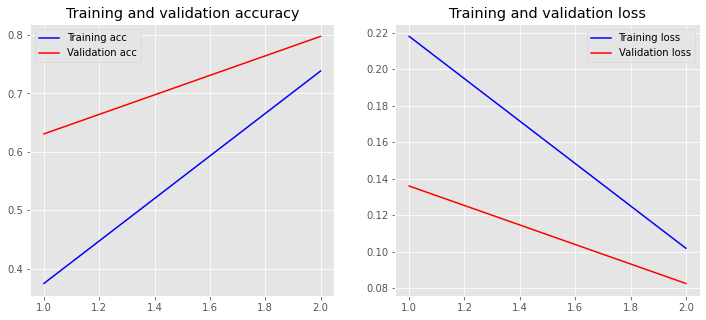

time: 44.3 s


In [31]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
            
history = model.fit(X_train, Y_train,
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    batch_size=batch_size)

loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

The first values represent the index in the vocabulary as you have learned from the previous examples. You can also see that the resulting feature vector contains mostly zeros, since you have a fairly short sentence. In the next part you will see how to work with word embeddings in Keras.

## RNN and LSTM

### Word embeddings

This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

We need to tokenize the data into a format that can be used by the word embeddings. `Keras` offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

We will start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. 


In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 5000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(train['label']).values
print('Shape of label ten675700sor:', Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


Found 13513 unique tokens.
Shape of data tensor: (11372, 250)
Shape of label ten675700sor: (11372, 12)
(10234, 250) (10234, 12)
(1138, 250) (1138, 12)
time: 405 ms


### Keras embedding layers

Notice that, at this point, our data is still hardcoded. We have not told Keras to learn a new embedding space through successive tasks. Now we can use the Embedding Layer of Keras which takes the previously calculated integers and maps them to a dense vector of the embedding. You will need the following parameters:


1.   **input_dim**: the size of the vocabulary
2.   **output_dim**: the size of the dense vector
3.   **input_length**: the length of the sequence


With the Embedding layer we have now a couple of options. One way would be to take the output of the embedding layer and plug it into a Dense layer. In order to do this you have to add a Flatten layer in between that prepares the sequential input for the Dense layer:

In [0]:
# making model

model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))

model_1.add(SpatialDropout1D(0.2))
model_1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_1.add(Dense(12, activation='softmax'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 250, 50)           675700    
_________________________________________________________________
dropout_4 (Dropout)          (None, 250, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 248, 250)          37750     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250)              

We have `675700` new parameters to train. This number comes from `vocab_size` times the `embedding_dim`. These weights of the embedding layer are initialized with random weights and are then adjusted through backpropagation during training. This model takes the words as they come in the order of the sentences as input vectors. 

Epoch 1/5
144/144 [==============================] - 230s 2s/step - loss: 0.0937 - accuracy: 0.7763 - val_loss: 0.0819 - val_accuracy: 0.8076
Epoch 2/5
144/144 [==============================] - 233s 2s/step - loss: 0.0599 - accuracy: 0.8593 - val_loss: 0.0688 - val_accuracy: 0.8496
Epoch 3/5
144/144 [==============================] - 229s 2s/step - loss: 0.0453 - accuracy: 0.9012 - val_loss: 0.0663 - val_accuracy: 0.8545
Epoch 4/5
144/144 [==============================] - 230s 2s/step - loss: 0.0358 - accuracy: 0.9219 - val_loss: 0.0663 - val_accuracy: 0.8594
Epoch 5/5
144/144 [==============================] - 233s 2s/step - loss: 0.0297 - accuracy: 0.9347 - val_loss: 0.0666 - val_accuracy: 0.8516
Training Accuracy: 0.9479
Testing Accuracy:  0.8489


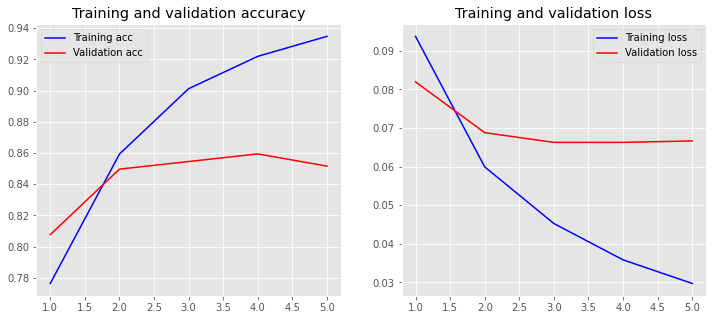

time: 19min 53s


In [0]:
epochs = 5
batch_size = 64

history = model_1.fit(X_train,
                    Y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1
                    )

loss, accuracy = model_1.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_1.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


## Result 

Accuracy on testing set:
- Random Forest  : 83.64%
- Convolution 1D : 80.40%
- RNN with LSTM   : 84.89%

RNN with LSTM model has highest accuracy, now we will perform testing on `test_set.csv` file. In order to do so we will export RNN with LSTM model.

# Exporting model

Machine learning model can take much time to execute. Our model didn't take much time for training set. But if there are millions of documents and the features are also in thousand then the machine learning model can take hours or even day in most cases. So it is recommended to export the machine learning model. 


In [32]:
from tensorflow import keras

# Save the model
model_1.save('text_classifier.h5')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('text_classifier.h5')

time: 160 ms


Once you execute the above script, you can see the `text_classifier` file in your working directory. We have saved our trained model and we can use it later for directly making predictions, without training.


> We will use the imported model to predict the unknown values in the 'text_set.csv' file


> We loaded our trained model and stored it in the `new_model` variable. Let's predict the sentiment for the test set using our loaded model and see if we can get the same results. 

In [109]:
new_predictions = new_model.predict(X_test_csv)

# Generate arg maxes for predictions
classes = np.argmax(new_predictions, axis = 1)

# show the inputs and predicted outputs

print("\n text and its classes from 1 to 12:\n")
for index, row in test.iloc[:10].iterrows():
  print(row['text']+ " => ", classes[index])



 text and its classes from 1 to 12:

lv tmd pd trip unit nh part circuit breaker =>  1
module tm analog output analog output expansion module plc tmaq =>  4
command group iii mechanismt part forcircuit breaker =>  3
part relayelectrical contact issu xxup =>  2
part programmable logic controller dm part plcs printed circuit assembl coo =>  1
part programmable logic controller part plcs printed circuit assembl coo =>  1
nmsp ext rotary handle mech part circuit breaker captive consumption =>  1
gang industrial box egy =>  3
element sh electrical fuse link actual user =>  1
uxab ra kit connec xk xsuppaux xprrce part circuit breaker =>  3
time: 1.72 s


> To perform prediction on `test_set.csv`, we must perform basic operation i.e. data cleaning and word embedding. We have already performed data cleaning on test_set.csv and now 

# Conclusion

Text classification is one of the most common natural language processing tasks. In this project we classified text into 12 different classe using Keras deep learning library. We used two different types of neural networks to classify text and labels. The results show that LSTM, which is a variant of RNN outperforms both the CNN and Random Forest.
